In [6]:
# wine data from sklearn
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [8]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [11]:
# apply kmeans to wine data

kmeans.labels_
wine.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [17]:
# add kmean and gmm to methods
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(wine.data)
gmm = GaussianMixture(n_components=3, random_state=0).fit(wine.data)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

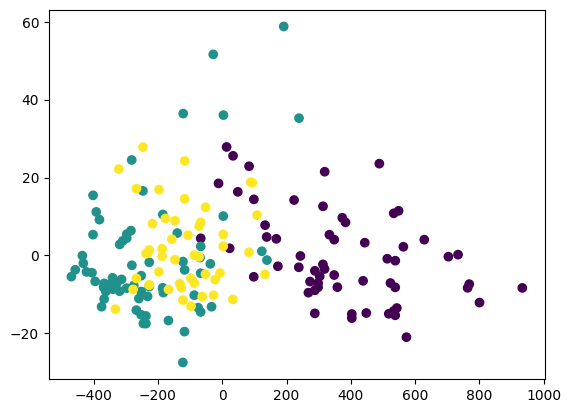

In [14]:
# apply pca to wine data for two dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wine.data)
wine_pca = pca.transform(wine.data)

import matplotlib.pyplot as plt
plt.scatter(wine_pca[:,0], wine_pca[:,1], c=wine.target)


from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(wine.target, gmm.predict(wine.data))
print(ari)

In [19]:

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(wine.target, kmeans.labels_)
print(ari)

0.37111371823084754


In [20]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(wine.target, gmm.predict(wine.data))
print(ari)

0.6074836799117163


/Users/viktordue/Documents/uni/AASAMC/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/viktordue/Documents/uni/AASAMC/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


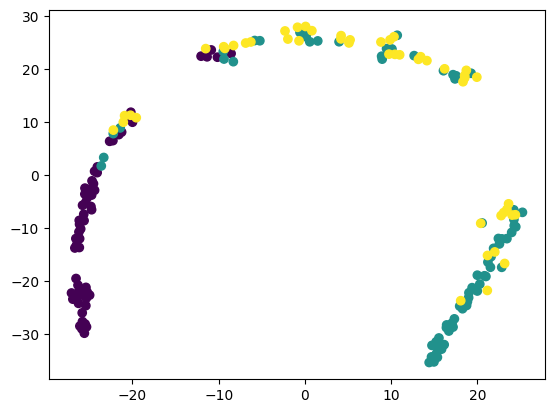

In [23]:
# t-sne for wine data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0,perplexity=10)
wine_tsne = tsne.fit_transform(wine.data)
plt.scatter(wine_tsne[:,0], wine_tsne[:,1], c=wine.target)

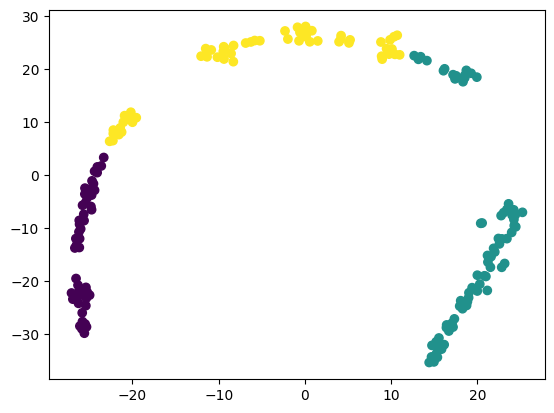

In [24]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(wine.data)

plt.scatter(wine_tsne[:,0], wine_tsne[:,1], c=agg.labels_)

In [26]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(wine.target, agg.labels_)
print(ari)

0.36840191587483156


In [ ]:
# https://towardsdatascience.com/k-means-clustering-of-wine-data-95bac074baae